In [1]:
import sympy.physics.units as u
import sympy as sp
import numpy as np
import logging as log
import functools
import matplotlib.pyplot as plt
%matplotlib inline

import importlib.util
#spec = importlib.util.spec_from_file_location("miptlabs", "/full/path/to/miptlabs.py")
#miptlabs = importlib.util.module_from_spec(spec)
#spec.loader.exec_module(miptlabs)
#ml = miptlabs

import miptlabs as ml
importlib.reload(ml)

import sys, importlib
importlib.reload(log)
log.basicConfig(level=log.INFO, format='%(message)s', stream=sys.stdout)

In [2]:
L = ml.PQ(0.5*u.m, sigma=1*u.mm, symbol='L')
d = ml.PQ(0.3*u.mm, sigma=0.01*u.mm, symbol='d')
M_ring = ml.PQ(740*u.mg, sigma=1*u.mg, symbol='M_ring')
M_holder = ml.PQ(109.6*u.g, sigma=0.1*u.g, symbol='M_holder')
M_1 = ml.PQ(494.6*u.g, sigma=0.1*u.g, symbol='M_1')
M_2 = ml.PQ(485.2*u.g, sigma=0.1*u.g, symbol='M_2')
M_3 = ml.PQ(494.1*u.g, sigma=0.1*u.g, symbol='M_3')

In [3]:
M_tot = ml.eval(u.g, lambda M_1, M_2, M_ring, M_holder: M_1+M_2+M_ring+M_holder, M_1, M_2, M_ring, M_holder, symbol='M_tot')
M_tot.repr_as(u.g)
M_tot.raw_print()

1090.14*gram
0.173207967484178*gram
0.000158885984813123


In [4]:
ro_l = ml.PQ(568.4*u.mg/(100*u.cm), 
             sigma=sp.sqrt((0.1*u.mg/u.kg)**2+(0.01*u.cm/u.m)**2)*u.kg/u.m, 
             symbol='ro_l', dim=u.g/u.cm) # Линейная плотность струны
ro_l.raw_print()
#ro_l.repr_as(u.g/u.cm)

0.005684*gram/centimeter
0.00100000049999988*gram/centimeter
0.175932529908493


In [5]:
g = ml.PQ(9.815*u.m/(u.s)**2, is_const=True, symbol='g')
T = ml.eval(u.force, lambda M_tot, g: M_tot*g, M_tot, g, symbol='T')

In [6]:
nu_n = lambda n, L, T, ro_l: n/(2*L)*sp.sqrt(T/ro_l)
#ml.eval(u.hz, functools.partial(nu_n, 1), L, T, ro_l)
#nu = np.array([ml.eval(u.hz, functools.partial(nu_n, i), L, T, ro_l) for i in range(1, 14)])
nu = np.array([ml.eval(u.hz, nu_n, i, L, T, ro_l) for i in range(1, 14)])

In [7]:
print(nu)

[137.201625±12.072238 hertz (0.087989)
 274.403250±24.144477 hertz (0.087989)
 411.604875±36.216715 hertz (0.087989)
 548.806500±48.288954 hertz (0.087989)
 686.008125±60.361192 hertz (0.087989)
 823.209750±72.433431 hertz (0.087989)
 960.411375±84.505669 hertz (0.087989)
 1097.613000±96.577907 hertz (0.087989)
 1234.814625±108.650146 hertz (0.087989)
 1372.016250±120.722384 hertz (0.087989)
 1509.217875±132.794623 hertz (0.087989)
 1646.419499±144.866861 hertz (0.087989)
 1783.621124±156.939100 hertz (0.087989)]


In [8]:
nu_exper = np.array([ml.PQ(val*u.hz, sigma=0.01*u.hz, dim=u.hz) for val in 
                     [140.55, 423.570, 713.87, 1002.30, 1283.62, 1575.11, 1873.45]])
print(nu_exper)

[140.550000±0.010000 hertz (0.000071) 423.570000±0.010000 hertz (0.000024)
 713.870000±0.010000 hertz (0.000014) 1002.300000±0.010000 hertz (0.000010)
 1283.620000±0.010000 hertz (0.000008)
 1575.110000±0.010000 hertz (0.000006)
 1873.450000±0.010000 hertz (0.000005)]


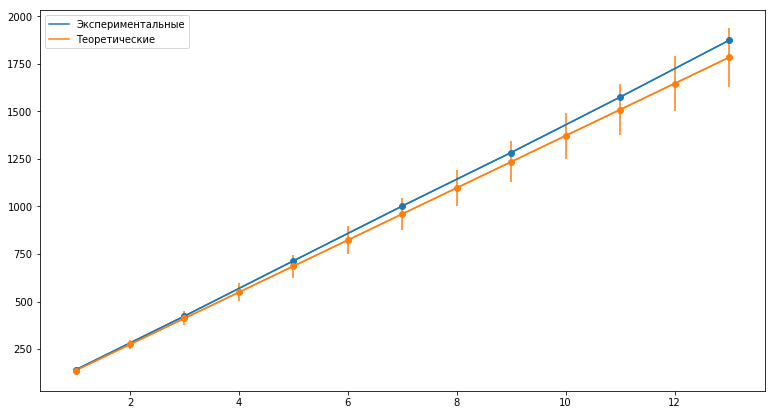

In [9]:
plt.figure(figsize=(13, 7))
grid_exper = np.arange(1, len(nu)+1, 2)
grid_theor = np.arange(1, len(nu)+1, 1)

ml.plt_pq(grid_exper, nu_exper, label='Экспериментальные')
ml.plt_pq(grid_theor, nu, label='Теоретические')
plt.show()